# Map the Participants in the Summer School

## Imports

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
df = pd.read_csv("../data/metadata/arm-summer-school-participants.csv")

In [27]:
df_instructors = df.loc[df["Career Level"].str.contains("Instructor")]
df_students = df.loc[~df["Career Level"].str.contains("Instructor")]

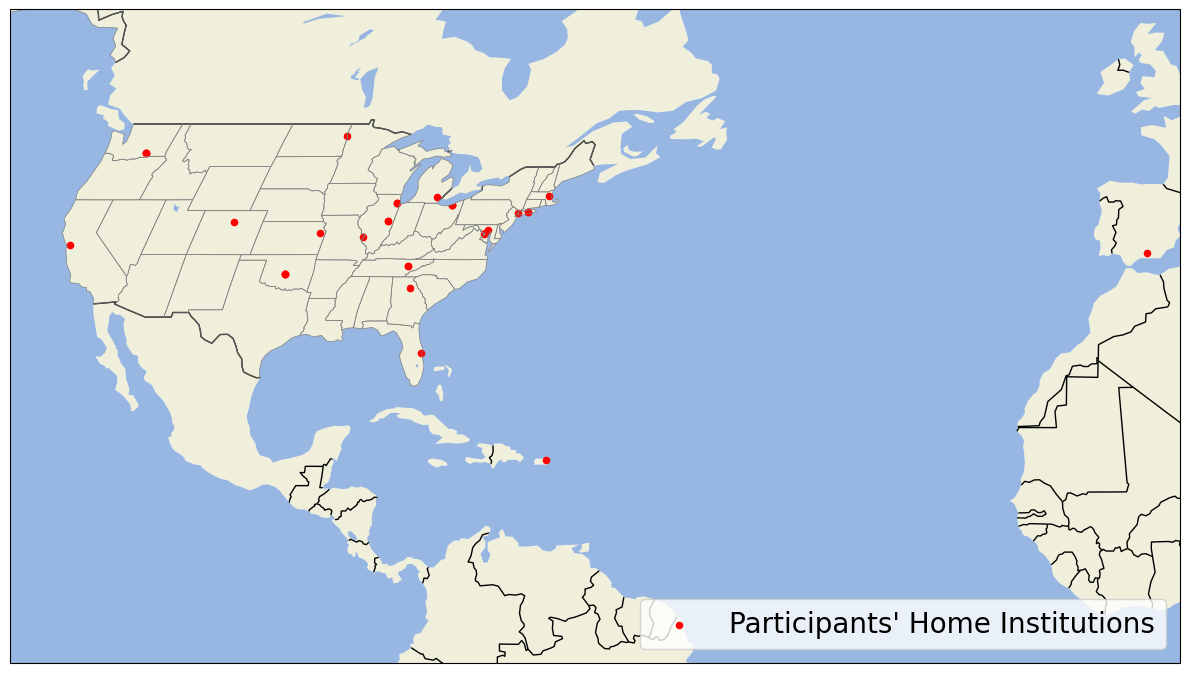

In [50]:
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(111,
                 projection=ccrs.Robinson()
                )
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.STATES,
               linewidth=0.5,
               edgecolor='grey')

df.plot.scatter(x='lon',
                y='lat',
                c='red',
                label="Participants' Home Institutions",
                transform=ccrs.PlateCarree(),
                ax=ax)

ax.set_extent([-120, 0, 0, 60], crs=ccrs.PlateCarree())
ax.legend(fontsize=20, loc='lower right')
plt.tight_layout()
plt.savefig("participant-map.png", dpi=300)

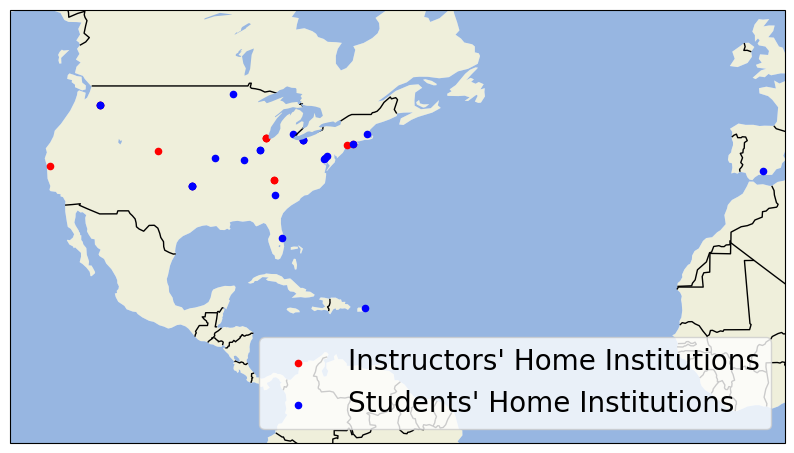

In [37]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111,
                 projection=ccrs.Robinson()
                )
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES)

df_instructors.plot.scatter(x='lon',
                            y='lat',
                            c='red',
                            label="Instructors' Home Institutions",
                            transform=ccrs.PlateCarree(),
                            ax=ax)

df_students.plot.scatter(x='lon',
                         y='lat',
                         c='blue',
                         label="Students' Home Institutions",
                         transform=ccrs.PlateCarree(),
                         ax=ax)

ax.set_extent([-120, 0, 0, 60], crs=ccrs.PlateCarree())
ax.legend(fontsize=20, loc='lower right')